In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# Connecting to Data Folder.
%cd /content/drive/MyDrive/AMS559_Smart_Energy


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AMS559_Smart_Energy


In [ ]:
import pandas as pd

# Load the dataset
train_data = '/mnt/data/train.csv'
data = pd.read_csv("train.csv")

# Display the dataset to understand its structure
data

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/8/requestedDeparture,userInputs/8/userID,userInputs/9/WhPerMile,userInputs/9/kWhRequested,userInputs/9/milesRequested,userInputs/9/minutesAvailable,userInputs/9/modifiedAt,userInputs/9/paymentRequired,userInputs/9/requestedDeparture,userInputs/9/userID
0,5e225f9ff9af8b5c26d21715,39,"Wed, 01 Jan 2020 09:42:14 GMT","Thu, 02 Jan 2020 02:25:40 GMT","Wed, 01 Jan 2020 14:42:11 GMT",32.020,2_39_131_30_2020-01-01 09:42:14.259248,2,CA-305,2-39-131-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e225f9ff9af8b5c26d21716,39,"Wed, 01 Jan 2020 18:10:34 GMT","Wed, 01 Jan 2020 21:05:40 GMT","Wed, 01 Jan 2020 19:22:56 GMT",2.328,2_39_127_19_2020-01-01 18:10:34.057445,2,CA-309,2-39-127-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e225f9ff9af8b5c26d21717,39,"Wed, 01 Jan 2020 19:44:51 GMT","Thu, 02 Jan 2020 01:23:37 GMT","Wed, 01 Jan 2020 22:43:57 GMT",19.868,2_39_79_377_2020-01-01 19:44:51.127414,2,CA-325,2-39-79-377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e225f9ff9af8b5c26d21718,39,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,2,CA-310,2-39-126-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e225f9ff9af8b5c26d21719,39,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,2,CA-491,2-39-79-382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,5fdd57d3f9af8b16e6675e09,39,"Mon, 30 Nov 2020 18:33:34 GMT","Mon, 30 Nov 2020 19:28:22 GMT",NaN,20.981,2_39_81_4550_2020-11-30 18:33:33.964339,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,5fdd57d3f9af8b16e6675e0a,39,"Mon, 30 Nov 2020 22:33:25 GMT","Tue, 01 Dec 2020 03:51:03 GMT","Mon, 30 Nov 2020 23:40:16 GMT",2.239,2_39_78_365_2020-11-30 22:33:25.300548,2,CA-321,2-39-78-365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,5fdd57d3f9af8b16e6675e0b,39,"Tue, 01 Dec 2020 02:10:20 GMT","Tue, 01 Dec 2020 02:49:04 GMT",NaN,21.032,2_39_81_4550_2020-12-01 02:10:19.997513,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,5fdd57d3f9af8b16e6675e0c,39,"Tue, 01 Dec 2020 04:02:32 GMT","Tue, 01 Dec 2020 04:17:36 GMT",NaN,6.367,2_39_81_4550_2020-12-01 04:02:32.406901,2,11900388,2-39-81-4550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert relevant columns to datetime format
data['doneChargingTime'] = data['doneChargingTime'].fillna(data['disconnectTime'])
time_columns = ['connectionTime', 'disconnectTime', 'doneChargingTime']
for col in time_columns:
    data[col] = pd.to_datetime(data[col], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')

# Display data to confirm conversion
data[time_columns]

,connectionTime,disconnectTime,doneChargingTime
0,2020-01-01 09:42:14,2020-01-02 02:25:40,2020-01-01 14:42:11
1,2020-01-01 18:10:34,2020-01-01 21:05:40,2020-01-01 19:22:56
2,2020-01-01 19:44:51,2020-01-02 01:23:37,2020-01-01 22:43:57
3,2020-01-02 01:12:29,2020-01-02 04:38:39,2020-01-02 03:11:48
4,2020-01-02 04:18:06,2020-01-03 00:06:13,2020-01-02 06:41:48
...,...,...,...
2269,2020-11-30 18:33:34,2020-11-30 19:28:22,2020-11-30 19:28:22
2270,2020-11-30 22:33:25,2020-12-01 03:51:03,2020-11-30 23:40:16
2271,2020-12-01 02:10:20,2020-12-01 02:49:04,2020-12-01 02:49:04
2272,2020-12-01 04:02:32,2020-12-01 04:17:36,2020-12-01 04:17:36


In [ ]:
# Aggregate data to calculate total kWh delivered per hour
# Using connectionTime as the reference point for each charging session

# Round down connectionTime to the nearest hour
data['connectionHour'] = data['connectionTime'].dt.floor('H')
data['doneChargingHour'] = data['doneChargingTime'].dt.floor('H')
req_columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'connectionHour', 'doneChargingHour', 'kWhDelivered' ]

data[req_columns]




,connectionTime,disconnectTime,doneChargingTime,connectionHour,doneChargingHour,kWhDelivered
0,2020-01-01 09:42:14,2020-01-02 02:25:40,2020-01-01 14:42:11,2020-01-01 09:00:00,2020-01-01 14:00:00,32.020
1,2020-01-01 18:10:34,2020-01-01 21:05:40,2020-01-01 19:22:56,2020-01-01 18:00:00,2020-01-01 19:00:00,2.328
2,2020-01-01 19:44:51,2020-01-02 01:23:37,2020-01-01 22:43:57,2020-01-01 19:00:00,2020-01-01 22:00:00,19.868
3,2020-01-02 01:12:29,2020-01-02 04:38:39,2020-01-02 03:11:48,2020-01-02 01:00:00,2020-01-02 03:00:00,8.336
4,2020-01-02 04:18:06,2020-01-03 00:06:13,2020-01-02 06:41:48,2020-01-02 04:00:00,2020-01-02 06:00:00,14.731
...,...,...,...,...,...,...
2269,2020-11-30 18:33:34,2020-11-30 19:28:22,2020-11-30 19:28:22,2020-11-30 18:00:00,2020-11-30 19:00:00,20.981
2270,2020-11-30 22:33:25,2020-12-01 03:51:03,2020-11-30 23:40:16,2020-11-30 22:00:00,2020-11-30 23:00:00,2.239
2271,2020-12-01 02:10:20,2020-12-01 02:49:04,2020-12-01 02:49:04,2020-12-01 02:00:00,2020-12-01 02:00:00,21.032
2272,2020-12-01 04:02:32,2020-12-01 04:17:36,2020-12-01 04:17:36,2020-12-01 04:00:00,2020-12-01 04:00:00,6.367


In [ ]:
import pandas as pd

def expand_and_distribute(row):
    start_hour = pd.to_datetime(row['connectionHour'])
    end_hour = pd.to_datetime(row['doneChargingHour'])
    kwh = row['kWhDelivered']

    # Generate all hours between start and end
    all_hours = pd.date_range(start=start_hour, end=end_hour, freq='H', inclusive='left')

    # Calculate kWh delivered per hour
    hours_count = len(all_hours)
    kwh_per_hour = kwh / hours_count if hours_count else 0

    # Create a DataFrame for each hour in the range
    hourly_data = pd.DataFrame({
        'connectionHour': all_hours,
        'doneChargingHour': end_hour,
        'kWhDelivered': kwh_per_hour
    })

    return hourly_data

# Apply the function to each row and concatenate the results
expanded_data = pd.concat([expand_and_distribute(row) for _, row in data.iterrows()], ignore_index=True)

# Display expanded dataframe
expanded_data


,connectionHour,doneChargingHour,kWhDelivered
0,2020-01-01 09:00:00,2020-01-01 14:00:00,6.404
1,2020-01-01 10:00:00,2020-01-01 14:00:00,6.404
2,2020-01-01 11:00:00,2020-01-01 14:00:00,6.404
3,2020-01-01 12:00:00,2020-01-01 14:00:00,6.404
4,2020-01-01 13:00:00,2020-01-01 14:00:00,6.404
...,...,...,...
7016,2020-11-30 18:00:00,2020-11-30 19:00:00,20.981
7017,2020-11-30 22:00:00,2020-11-30 23:00:00,2.239
7018,2020-12-01 02:00:00,2020-12-01 02:00:00,21.032
7019,2020-12-01 04:00:00,2020-12-01 04:00:00,6.367


In [ ]:
# Group by the rounded connectionHour and aggregate kWhDelivered
kwh_per_hour = expanded_data.groupby('connectionHour')['kWhDelivered'].sum().reset_index()

# Display the aggregated rows
kwh_per_hour

,connectionHour,kWhDelivered
0,2020-01-01 09:00:00,6.4040
1,2020-01-01 10:00:00,6.4040
2,2020-01-01 11:00:00,6.4040
3,2020-01-01 12:00:00,6.4040
4,2020-01-01 13:00:00,6.4040
...,...,...
1691,2020-11-30 20:00:00,0.1788
1692,2020-11-30 21:00:00,0.1788
1693,2020-11-30 22:00:00,2.2390
1694,2020-12-01 02:00:00,21.0320


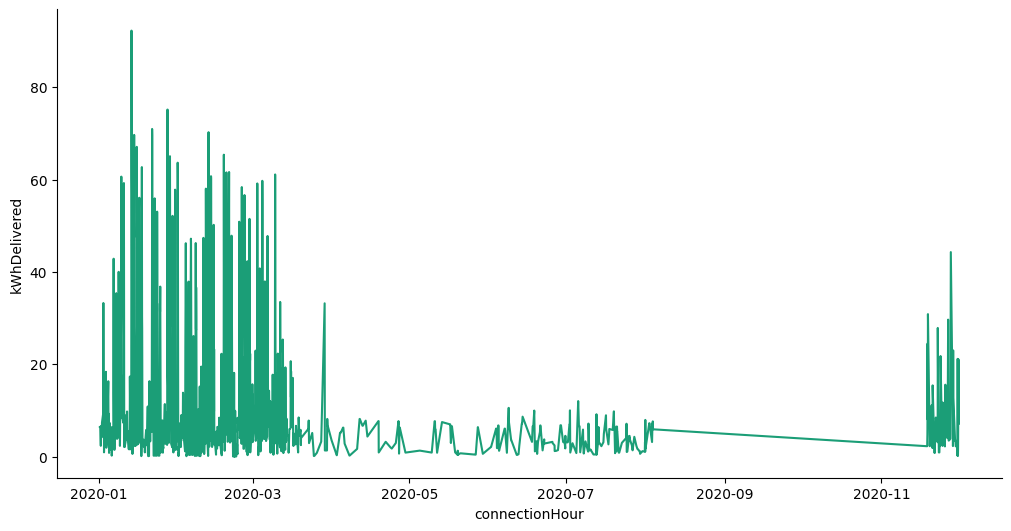

In [ ]:
# @title connectionHour vs kWhDelivered

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['connectionHour']
  ys = series['kWhDelivered']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = kwh_per_hour.sort_values('connectionHour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('connectionHour')
_ = plt.ylabel('kWhDelivered')

In [ ]:
# Create a complete range of hourly timestamps
time_range = pd.date_range(start=kwh_per_hour['connectionHour'].min(),
                           end=kwh_per_hour['connectionHour'].max(),
                           freq='H')

# Create a DataFrame from the complete time range
complete_time_df = pd.DataFrame(time_range, columns=['connectionHour'])

# Merge with the aggregated data to identify missing hours
merged_data = pd.merge(complete_time_df, kwh_per_hour, on='connectionHour', how='left')

# Check for missing values, indicating missing hours
missing_hours = merged_data[merged_data['kWhDelivered'].isnull()]

# Display missing hours, if any
missing_hours



,connectionHour,kWhDelivered
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,NaN
8,2020-01-01 17:00:00,NaN
13,2020-01-01 22:00:00,NaN
...,...,...
8022,2020-11-30 15:00:00,NaN
8030,2020-11-30 23:00:00,NaN
8031,2020-12-01 00:00:00,NaN
8032,2020-12-01 01:00:00,NaN


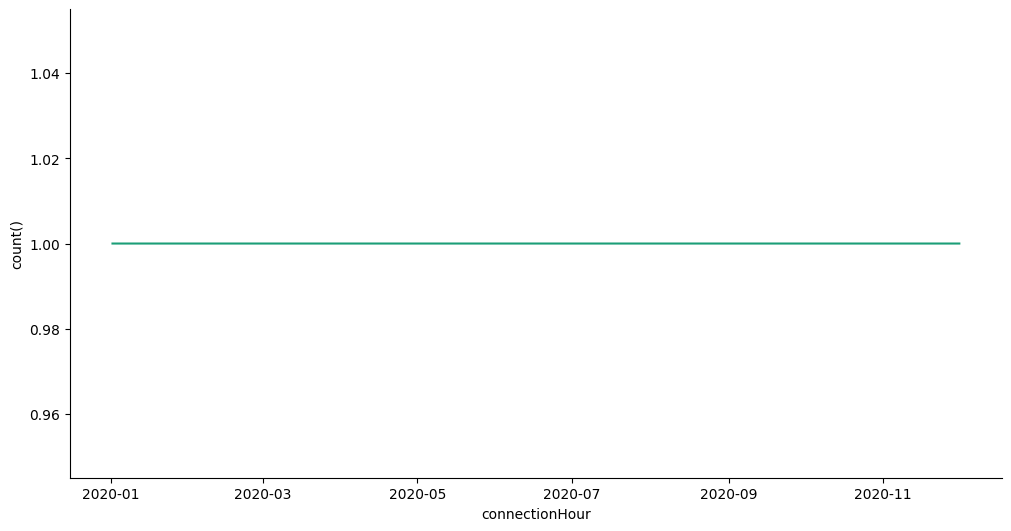

In [ ]:
# @title connectionHour vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['connectionHour']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'connectionHour'}, axis=1)
              .sort_values('connectionHour', ascending=True))
  xs = counted['connectionHour']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = missing_hours.sort_values('connectionHour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('connectionHour')
_ = plt.ylabel('count()')

In [ ]:

merged_data['kWhDelivered'] = merged_data['kWhDelivered'].fillna(0)


# Display some of the previously missing rows to confirm they're now filled
merged_data.loc[missing_hours.index].head()
merged_data


,connectionHour,kWhDelivered
0,2020-01-01 09:00:00,6.404
1,2020-01-01 10:00:00,6.404
2,2020-01-01 11:00:00,6.404
3,2020-01-01 12:00:00,6.404
4,2020-01-01 13:00:00,6.404
...,...,...
8031,2020-12-01 00:00:00,0.000
8032,2020-12-01 01:00:00,0.000
8033,2020-12-01 02:00:00,21.032
8034,2020-12-01 03:00:00,0.000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
import numpy as np

# Scale the kWhDelivered
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['kWhDelivered'].values.reshape(-1, 1))

# Function to create the dataset in LSTM format
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert 'connectionHour' to datetime if it's not already
merged_data['connectionHour'] = pd.to_datetime(merged_data['connectionHour'])

# Set 'connectionHour' as the index
merged_data.set_index('connectionHour', inplace=True)

# Define the split points
train_end = merged_data.index.min() + pd.DateOffset(months=8)
test_start = train_end + pd.DateOffset(hours=1)

# Find the indices for splitting
train_end_idx = merged_data.index.get_loc(train_end)
test_start_idx = merged_data.index.get_loc(test_start)

# Split the data
trainX, testX = X[:train_end_idx], X[test_start_idx:]
trainY, testY = Y[:train_end_idx], Y[test_start_idx:]

early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.fit(trainX, trainY, epochs=100, batch_size=128, verbose=1, validation_data=(testX, testY), callbacks=[early_stop])

# Make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

# Calculate MAE
train_mae = mean_absolute_error(trainY[0], train_predict[:,0])
test_mae = mean_absolute_error(testY[0], test_predict[:,0])
print('Train MAE:', train_mae, '\nTest MAE:', test_mae)



Epoch 1/100
46/46 [==============================] - 4s 22ms/step - loss: 0.0076 - val_loss: 0.0011
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 8.5412e-04
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 7.5584e-04
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 7.2341e-04
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 7.4830e-04
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 7.5168e-04
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 7.9003e-04
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 6.9465e-04
Epoch 9/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 7.4226e-04
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
# Generate future timestamps
future_dates = pd.date_range(start='2020-12-01 12:00:00', periods=744, freq='H')

# Predict the next values
last_known_batch = scaled_data[-look_back:]
future_predictions = []
future_steps = 744

for _ in range(len(future_dates)):
    last_known_batch = last_known_batch.reshape((1, 1, look_back))
    future_pred = model.predict(last_known_batch)
    future_predictions.append(future_pred[0,0])
    last_known_batch = np.append(last_known_batch, future_pred)[1:]
    # last_known_batch = np.append(last_known_batch[:, :, 1:], [[future_pred]], axis=2)

future_predictions = np.array(future_predictions)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'RowID': range(1, future_steps + 1),
    'Predicted': future_predictions.flatten().round(3)
})

print(predictions_df.head(200))

1/1 [==============================] - 0s 29ms/step
     RowID  Predicted
0        1      6.057
1        2      5.169
2        3      4.416
3        4      3.779
4        5      3.240
..     ...        ...
195    196      0.342
196    197      0.342
197    198      0.342
198    199      0.342
199    200      0.342

[200 rows x 2 columns]


In [ ]:
predictions_df.to_csv('Submission.csv', index=False)